In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.linear_model import LinearRegression

In [4]:
natgas_df = pd.read_csv('Nat_Gas.csv')
natgas_df

,Dates,Prices
0,10/31/20,10.10
1,11/30/20,10.30
2,12/31/20,11.00
3,1/31/21,10.90
4,2/28/21,10.90
5,3/31/21,10.90
6,4/30/21,10.40
7,5/31/21,9.84
8,6/30/21,10.00
9,7/31/21,10.10


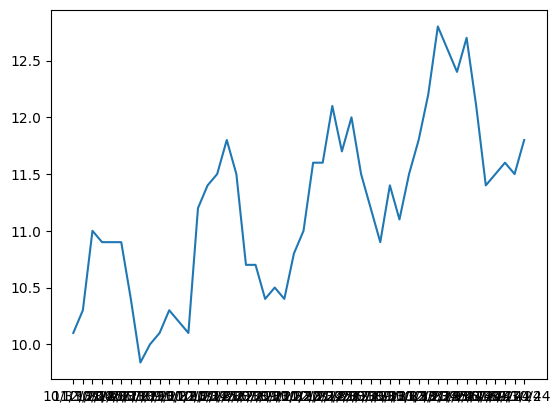

In [6]:
plt.plot(natgas_df['Dates'], natgas_df['Prices'])

In [7]:
# Select January Prices
natgas_df['Dates'] = pd.to_datetime(natgas_df['Dates'])

natgas_df['Year'] = natgas_df['Dates'].dt.year
natgas_df['Month'] = natgas_df['Dates'].dt.month

# Only Jan Months
natgas_jan = natgas_df[natgas_df['Month'] == 1]
natgas_jan


,Dates,Prices,Year,Month
3,2021-01-31,10.9,2021,1
15,2022-01-31,11.5,2022,1
27,2023-01-31,12.1,2023,1
39,2024-01-31,12.6,2024,1


In [12]:
x = np.array(natgas_df[natgas_df['Month'] == 1]['Year']).reshape(-1,1)
y = np.array(natgas_df[natgas_df['Month'] == 1]['Prices'])
y

reg = LinearRegression().fit(x,y)

In [13]:
round(float(reg.predict([[2025]])),2)

<ipython-input-13-4d1f0274c69c>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  round(float(reg.predict([[2025]])),2)


13.2

In [16]:
def next_year_price(next_year):
    # return a predicted value for each month for the following year
    price_list = []
    for i in np.arange(12):
        x = np.array(natgas_df[natgas_df['Month'] == 1+i]['Year']).reshape(-1,1)
        y = np.array(natgas_df[natgas_df['Month'] == 1+i]['Prices'])
        reg = LinearRegression().fit(x,y)
        price = reg.predict([[next_year]])
        price_list.append(round(float(price),2))
    return price_list


In [17]:
gas_price25 = next_year_price(2025)
np.array(gas_price25)

<ipython-input-16-fa87731305d6>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  price_list.append(round(float(price),2))
<ipython-input-16-fa87731305d6>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  price_list.append(round(float(price),2))
<ipython-input-16-fa87731305d6>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  price_list.append(round(float(price),2))
<ipython-input-16-fa87731305d6>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar

array([13.2 , 12.8 , 13.25, 12.65, 12.08, 11.95, 12.25, 11.9 , 12.45,
       12.85, 13.46, 13.66])

In [43]:
from datetime import datetime, timedelta

def get_last_of_each_month(year) :
    dates_array = []

    # Start from the last day of the year
    current_date = datetime(year, 12, 31)
    
    while current_date.year == year:

        # Set the date
        dates_array.append(current_date.strftime('%Y-%m-%d'))
        month = current_date.month
        year = current_date.year
        
        # Set first day of the previous month
        current_date = current_date.replace(year=year, month=month, day=1)

        # Move back one day to get the last day of the current month
        current_date -= timedelta(days=1)

    # Reverse the array for ascending order
    return dates_array[::-1] 

In [44]:
dates_2025 = get_last_of_each_month(2025)
dates_2025

['2025-01-31',
 '2025-02-28',
 '2025-03-31',
 '2025-04-30',
 '2025-05-31',
 '2025-06-30',
 '2025-07-31',
 '2025-08-31',
 '2025-09-30',
 '2025-10-31',
 '2025-11-30',
 '2025-12-31']

In [45]:
# dataframe for 2025 dates and prices
projected_gas_prices25_df = pd.DataFrame({'Dates': dates_2025, 'Prices': gas_price25})
projected_gas_prices25_df

projected_gas_prices25_df['Dates'] = pd.to_datetime(projected_gas_prices25_df['Dates'])

projected_gas_prices25_df['Year'] = projected_gas_prices25_df['Dates'].dt.year
projected_gas_prices25_df['Month'] = projected_gas_prices25_df['Dates'].dt.month
projected_gas_prices25_df


,Dates,Prices,Year,Month
0,2025-01-31,13.20,2025,1
1,2025-02-28,12.80,2025,2
2,2025-03-31,13.25,2025,3
3,2025-04-30,12.65,2025,4
4,2025-05-31,12.08,2025,5
5,2025-06-30,11.95,2025,6
6,2025-07-31,12.25,2025,7
7,2025-08-31,11.90,2025,8
8,2025-09-30,12.45,2025,9
9,2025-10-31,12.85,2025,10


In [46]:
gas_df = pd.concat([natgas_df, projected_gas_prices25_df], ignore_index=True)
gas_df

,Dates,Prices,Year,Month
0,2020-10-31,10.10,2020,10
1,2020-11-30,10.30,2020,11
2,2020-12-31,11.00,2020,12
3,2021-01-31,10.90,2021,1
4,2021-02-28,10.90,2021,2
5,2021-03-31,10.90,2021,3
6,2021-04-30,10.40,2021,4
7,2021-05-31,9.84,2021,5
8,2021-06-30,10.00,2021,6
9,2021-07-31,10.10,2021,7


In [47]:
def get_gas_price(month, year):
    print(gas_df[(gas_df['Year'] == year) & (gas_df['Month'] == month)]['Prices'])

In [48]:
get_gas_price(10,2025)

57    12.85
Name: Prices, dtype: float64


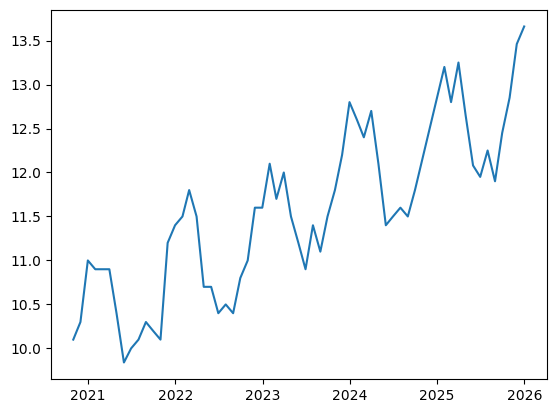

<class 'ValueError'>: x and y must have same first dimension, but have shapes (48,) and (60,)

In [49]:
# now analyse
plt.plot(gas_df['Dates'], gas_df['Prices'], label = 'Predicted 2025')
plt.plot(natgas_df['Dates'], gas_df['Prices'], label = 'Actuals 2021-24')
plt.ylabel('Gas Price in $')
plt.xlabel('Year')
plt.title('Gas Price Forecast', fontweight='bold')
plt.legend()

In [50]:
from datetime import date
import math

def price_contract(in_dates, in_prices, out_dates, out_prices, rate, storage_cost_rate, total_vol, injection_withdrawal_cost_rate):
    volume = 0
    buy_cost = 0
    cash_in = 0
    last_date = min(min(in_dates), min(out_dates))
    
    # Ensure dates are in sequence
    all_dates = sorted(set(in_dates + out_dates))
    
    for i in range(len(all_dates)):
        # processing code for each date
        start_date = all_dates[i]

        if start_date in in_dates:
            # Inject on these dates and sum up cash flows
            if volume <= total_vol - rate:
                volume += rate

                # Cost to purchase gas
                buy_cost += rate * in_prices[in_dates.index(start_date)]
                # Injection cost
                injection_cost = rate * injection_withdrawal_cost_rate
                buy_cost += injection_cost
                print('Injected gas on %s at a price of %s'%(start_date, in_prices[in_dates.index(start_date)]))

            else:
                # We do not want to inject when rate is greater than total volume minus volume
                print('Injection is not possible on date %s as there is insufficient space in the storage facility'%start_date)
        elif start_date in out_dates:
            #Withdraw on these dates and sum cash flows
            if volume >= rate:
                volume -= rate
                cash_in += rate * out_prices[out_dates.index(start_date)]
                # Withdrawal cost
                withdrawal_cost = rate * injection_withdrawal_cost_rate
                cash_in -= withdrawal_cost
                print('Extracted gas on %s at a price of %s'%(start_date, out_prices[out_dates.index(start_date)]))
            else:
                # we cannot withdraw more gas than is actually stored
                print('Extraction is not possible on date %s as there is insufficient volume of gas stored'%start_date)
                
    store_cost = math.ceil((max(out_dates) - min(in_dates)).days // 30) * storage_cost_rate
    return cash_in - store_cost - buy_cost

# Example usage of price_contract()
in_dates = [date(2022, 1, 1), date(2022, 2, 1), date(2022, 2, 21), date(2022, 4, 1)] #injection dates
in_prices = [20, 21, 20.5, 22]#prices on the injection days
out_dates = [date(2022, 1, 27), date(2022, 2, 15), date(2022, 3, 20), date(2022, 6, 1)] # extraction dates
out_prices = [23, 19, 21, 25] # prices on the extraction days
rate = 100000  # rate of gas in cubic feet per day
storage_cost_rate = 10000  # total volume in cubic feet
injection_withdrawal_cost_rate = 0.0005  # $/cf
max_storage_volume = 500000 # maximum storage capacity of the storage facility
result = price_contract(in_dates, in_prices, out_dates, out_prices, rate, storage_cost_rate, max_storage_volume, injection_withdrawal_cost_rate)
print()
print(f"The value of the contract is: ${result}")


Injected gas on 2022-01-01 at a price of 20
Extracted gas on 2022-01-27 at a price of 23
Injected gas on 2022-02-01 at a price of 21
Extracted gas on 2022-02-15 at a price of 19
Injected gas on 2022-02-21 at a price of 20.5
Extracted gas on 2022-03-20 at a price of 21
Injected gas on 2022-04-01 at a price of 22
Extracted gas on 2022-06-01 at a price of 25

The value of the contract is: $399600.0
